In [1]:
#Please Run all cells in order and one by one to use each interactive plot separately.

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
#code in this cell is from https://mljar.com/blog/jupyter-notebook-hide-code/

# Coherent States.

This notebook's purpose is to explain the coherent states of an harmonic oscilator, providing several animations:


An harmonic oscillator has a potential: $V(x) = \frac{1}{2}kx^2 , \hspace{1cm} k = m \omega^2 $

Using Schrödingers time independent equation, we can find the oscillator's Hamiltoninan eigenstates to be:

$$
\Phi_n(u) = C_n H_n(u) e^{-\frac{u^2}{2}} \hspace{1.5cm} u = \frac{x}{x_0} \hspace{1.5cm} x_0 = \sqrt{\frac{ħ}{m\omega}}
$$

$$
E_n = ħ\omega \left( n + \frac{1}{2} \right) \hspace{1.5cm} C_n = \frac{1}{\sqrt{x_0 2^n n \sqrt{\pi}}}
$$

Where $H_n$ are the Hermite polynomial functions and u is a nondimensionalized position coordinate.

In the context of a quantum harmonic oscillator, the creation ($â$) and annihilation ($â^\dagger$) operators can be defined as operators such that:

$$
â\left( \Phi_n \right) = \sqrt{n+1}\Phi_{n+1}  
$$

$$
â^\dagger\left( \Phi_n \right) = \sqrt{n}\Phi_{n-1} \hspace{1.5cm} â^\dagger\left( \Phi_0 \right) = 0
$$

In a differential form, these operators can be found to be:

$$
â = \frac{1}{\sqrt{2}}\left( -\frac{d}{du} + u \right) \hspace{1.5cm} â^\dagger = \frac{1}{\sqrt{2}}\left( -\frac{d}{du} + u \right)
$$

We can find the eigenfunctions of the creation and annhilation operators as analitic functions solving the differential equations:



Alternatively, we can find these eigenfunctions as a combination of the Hamiltonian eigenfunctions $\Phi_n$.

This explanation hasn't been concluded yet.

valor propi a
base propia no ortonormal
valors esperats

## 2D representation of $|ψ(u,t)|^2$
In the following figure we can see the evolution of the probability density function. The exact solution is compared with a finite sum of eigenstates.

<IPython.core.display.Javascript object>


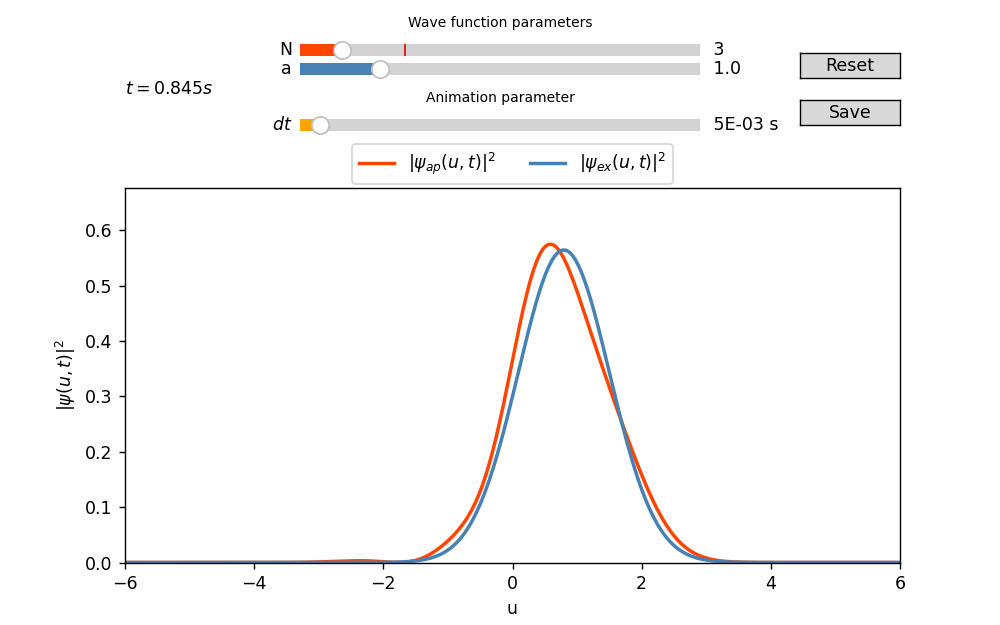

In [6]:
import numpy as np
from numpy import pi, sin, cos, exp, sqrt
from math import factorial
from numpy.polynomial.hermite import Hermite
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

#We activate the interactive mode in order to display animations
%matplotlib notebook

#We define the approximated time dependent wave function
def Psi1(X,t):
    fun = Hermite([a**n*exp(-I*2*pi*(n+1/2)*t)/(sqrt(factorial(n))*sqrt(2**n*factorial(n)*sqrt(pi))) for n in range(N+1)])  \
            /sqrt( sum(abs(a)**(2*n)/factorial(n) for n in range(N)) )
    Psi1 = fun(X)*exp(-X**2/2)
    return Psi1                   
                       
#We define the exact time dependent wave function
def Psi2(X,t):
    Psi2 = exp(-I*pi*t)*exp(-(X-sqrt(2)*a*cos(2*pi*t))**2 /2 - I*X*sqrt(2)*a*sin(2*pi*t))/pi**(1/4)
    return Psi2

#Program constants
I = complex(0,1)


# -----------------------------------------------------------------------------------------------

def find_lims(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of Y
    ymax = np.max(Y)
    ymin = np.min(Y)
    
    if(ymax >= 0 and ymin >= 0):
        lim_inf, lim_sup = ymin*0.8, ymax*1.2
    elif(ymax > 0 and ymin < 0):
        lim_inf, lim_sup = ymin*1.2, ymax*1.2
    elif(ymax < 0 and ymin < 0):
        lim_inf, lim_sup = ymin*1.2, ymax*0.8
    
    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_comparation_rhox_2D(Psi_ap,Psi_ex,t0,total_frames):
# Input: Psi_ap(X,t), aproximated wave function we want to represent (function of the array X and the time t).
#                     this wave function must have N,a as implicit parameters
# Input: Psi_ex(X,t), exact wave function we want to represent (function of the array X and the time t).
#                     this wave function must have N,a as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_N = fig.add_axes([0.3, 0.90, 0.4, 0.04])
        ax_N.set_title('Wave function parameters',fontsize=8)
        ax_a = fig.add_axes([0.3, 0.87, 0.4, 0.04])
        
        ax_dt = fig.add_axes([0.3, 0.78, 0.4, 0.04])
        ax_dt.set_title('Animation parameter',fontsize=8)
        
        #We create the sliders as widgets
        s_N = Slider(ax=ax_N, label='N', valmin=1, valmax=20, valinit=N, valstep = 1, valfmt=' %0.0f',facecolor='orangered')
        s_a = Slider(ax=ax_a, label='a', valmin=0.5, valmax=3, valinit=a, valfmt=' %1.1f ', facecolor='steelblue')
        s_dt = Slider(ax=ax_dt,label='$dt$',valmin=0.0001,valmax=0.1,valinit=dt,valfmt=' %.E s',facecolor='orange')    
        
        #We return all axes and sliders created in the function
        return ax_N, ax_a, ax_dt, s_N, s_a, s_dt
    
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.8,0.875,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders and time
            global t
            s_N.reset()
            s_a.reset()
            s_dt.reset()
            t = t0
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.8,0.80,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Coherent_state_animated_rhox.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_save
        
        
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We restart the time
        global t
        t = t0
        
#       We add some graphic details
        ax.set_xlabel('u')
        ax.set_ylabel('$|ψ(u,t)|^2$')
        ax.legend(bbox_to_anchor=(0., 1.04, 1.,.10),loc = 'upper center',ncol=2)
        ax.axhline(y = 0,color = 'black',linestyle = '--',lw = 0.5)
        
#       We compute the initial information
        X = np.linspace(x0,xf,1000)
        Y = Psi_ex(X,t0)
        
#       We use the initial function limits
        ymin, ymax = find_lims(np.abs(Y)**2)
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
#       We represent both functions
        line1.set_data(X, np.abs(Psi_ap(X,t))**2)
        line2.set_data(X, np.abs(Y)**2) 
    
        #We return all line functions
        return line1, line2
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame
        global t,X,Y
        t = t + dt
        X = np.linspace(x0,xf,1000)
        Y = Psi_ex(X,t)

#       We actualize the time and x2 annotations
        time_annotation.set_text("$t = {:10.3f} s $".format(t))

#       We represent both functions
        line1.set_data(X, np.abs(Psi_ap(X,t))**2)    
        line2.set_data(X, np.abs(Y)**2) 
        
        #We return all line functions
        return line1, line2
    
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global N,k,a,x0,xf,ymin,ymax,dt
        N = round(s_N.val)
        a = s_a.val
        dt = s_dt.val
        
        x0 = -6*a
        xf = 6*a

        #We compute and apply the new limits in the main figure
        X = np.linspace(x0,xf,1000)
        Y = Psi_ex(X,t0)
        ymin, ymax = find_lims(np.abs(Y)**2)
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
        plt.show()
        return
    
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global N,a,x0,xf,t,dt
    N = 6
    a = 1

    #We initialize figure's variables
    t = t0
    dt = 0.005
    x0 = -5*a
    xf = 5*a
    
    #We define figure's axes and main line
    fig, ax = plt.subplots(figsize=(8,5),dpi=100)
    fig.subplots_adjust(bottom = 0.1, top = 0.70)
    line1, = ax.plot([], [], lw=2, label = '$|ψ_{ap}(u,t)|^2$', color = 'orangered')
    line2, = ax.plot([], [], lw=2, label = '$|ψ_{ex}(u,t)|^2$', color = 'steelblue')    
    
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)
    
    #We create the desired sliders
    ax_N, ax_a, ax_dt, s_N, s_a, s_dt = create_sliders()
    
    #We generate the two buttons
    b_reset, b_save = generate_buttons()   
    
    #We generate the annotations
    time_annotation = ax.annotate("$t = {:10.3f} s $".format(t), xy=(0, 1.25), xycoords="axes fraction")
    
    #We call the update function when any slider is used
    s_N.on_changed(update)
    s_a.on_changed(update)
    s_dt.on_changed(update)
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended 
t0 = 0
total_frames = 300

anim, b_reset, b_save = animate_interactive_comparation_rhox_2D(Psi1,Psi2,t0,total_frames)

## 3D representation of $ψ(u,t)$
In the following figure, the time dependent real and imaginary parts of of both the coherent state and its aproximation using a finite sum of eigenstates are shown in a 3D plot.

<IPython.core.display.Javascript object>


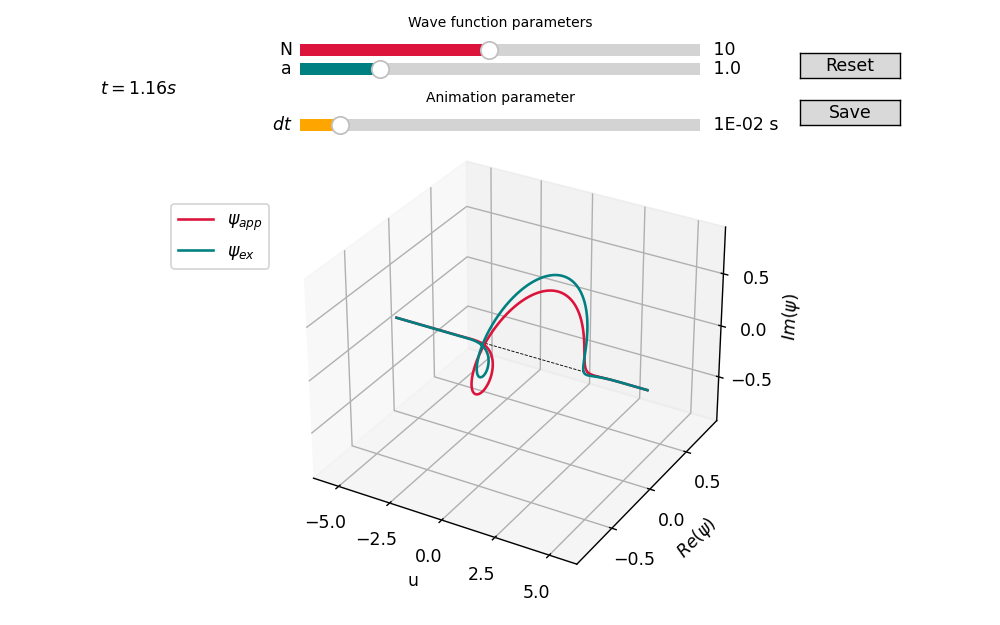

In [7]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

#We enable the interactive mode for the next graphic
%matplotlib notebook


# -----------------------------------------------------------------------------------------------

def find_lims_abs(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of the imaginary and real part of Y (wavefunction array)
    ymax = np.max(Y)
    ymin = -ymax
    lim_inf, lim_sup = ymin*1.2, ymax*1.2

    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_comparation_Psi_3D(Psi_ap,Psi_ex,t0,total_frames):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have N,a as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_N = fig.add_axes([0.3, 0.90, 0.4, 0.04])
        ax_N.set_title('Wave function parameters',fontsize=8)
        ax_a = fig.add_axes([0.3, 0.87, 0.4, 0.04])
        
        ax_dt = fig.add_axes([0.3, 0.78, 0.4, 0.04])
        ax_dt.set_title('Animation parameter',fontsize=8)
        
        #We create the sliders as widgets
        s_N = Slider(ax=ax_N, label='N', valmin=1, valmax=20, valinit=N, valstep = 1, valfmt=' %0.0f',facecolor='crimson')
        s_a = Slider(ax=ax_a, label='a', valmin=0.5, valmax=3, valinit=a, valfmt=' %1.1f ', facecolor='teal')
        s_dt = Slider(ax=ax_dt,label='$dt$',valmin=0.0001,valmax=0.1,valinit=dt,valfmt=' %.E s',facecolor='orange')    
        
        #We return all axes and sliders created in the function
        return ax_N, ax_a, ax_dt, s_N, s_a, s_dt
    
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.8,0.875,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders and time
            global t
            t = t0 - dt
            s_N.reset()
            s_a.reset()
            s_dt.reset()
            ax.view_init()
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.8,0.80,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Coherent_state_animated_Psi_3D.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_save
        
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We restart the time
        global t
        t = t0

#       We add some graphic details
        ax.set_xlabel('u')
        ax.set_ylabel('$Re(ψ)$')
        ax.set_zlabel('$Im(ψ)$')
        ax.legend(bbox_to_anchor=(-0.25, 0.60, .25,.25))

        
#       We compute the initial information
        X = np.linspace(x0,xf,2000)
        ymin,ymax = find_lims_abs(np.abs(Psi_ex(X,t0)))
        
#       We use the initial function limits
        ax.set_xlim3d(x0, xf)
        ax.set_ylim3d(ymin,ymax)
        ax.set_zlim3d(ymin,ymax)
        
        #We return the axis line
        return line0, line1, line2
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame and actualize the line
        global t, X
        t = t + dt
        
#       We actualize the function's information
        X = np.linspace(x0,xf,2000)
    
        Y1 = np.real(Psi_ap(X,t))
        Z1 = np.imag(Psi_ap(X,t))
        
        Y2 = np.real(Psi_ex(X,t))
        Z2 = np.imag(Psi_ex(X,t))

#       We represent the new function
        line1.set_data(X, Y1)
        line1.set_3d_properties(Z1)
        
        line2.set_data(X, Y2)
        line2.set_3d_properties(Z2)

#       We add a line at (x,0,0) to better visualize the complex axis
        line0.set_data([x0,xf],[0,0])
        line0.set_3d_properties([0,0])
        
#       We actualize the needed annotations
        time_annotation.set_text("$t = {:10.2f} s $".format(t))
        
        #We return all line functions
        return line0, line1, line2
    
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global N,k,a,x0,xf,ymin,ymax,dt
        N = round(s_N.val)
        a = s_a.val
        dt = s_dt.val
        
        x0 = -6*a
        xf = 6*a
        
        #We compute and apply the new limits in the main figure
        X = np.linspace(x0,xf,2000)
        ymin, ymax = find_lims_abs(np.abs(Psi_ex(X,t0)))
        
        ax.set_xlim3d(x0, xf)
        ax.set_ylim3d(ymin,ymax)
        ax.set_zlim3d(ymin,ymax)
                
        plt.show()
        return
    
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global N,a,x0,xf,t,dt
    N = 10
    a = 1

    #We initialize figure's variables
    t = t0
    dt = 0.01
    x0 = -6*a
    xf = 6*a
    
    #We define figure's axes and main line
    fig = plt.figure(figsize=(8,5),dpi=100)
    fig.subplots_adjust(bottom = 0.05, top = 0.80)
    ax = fig.add_subplot(111,projection='3d')

    line0, = ax.plot([], [], [], 'k--', lw=0.5)
    line1, = ax.plot([], [], [], lw=1.5, label = '$ψ_{app}$', color = 'crimson')
    line2, = ax.plot([], [], [], lw=1.5, label = '$ψ_{ex}$', color = 'teal')
    
    #We avoid too many ticks at the axes
    plt.locator_params(nbins=5)
        
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)
    
    #We create the desired sliders
    ax_N, ax_a, ax_dt, s_N, s_a, s_dt = create_sliders()
    
    #We generate the two buttons
    b_reset, b_save = generate_buttons()   
    
    #We generate the annotations
    time_annotation = ax.annotate("$t = {:10.3f} s $".format(t), xy=(0.10, 0.85), xycoords="figure fraction")
    
    #We call the update function when any slider is used
    s_N.on_changed(update)
    s_a.on_changed(update)
    s_dt.on_changed(update)
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended 
t0 = 0
total_frames = 300

anim, b_reset, b_save = animate_interactive_comparation_Psi_3D(Psi1,Psi2,t0,total_frames)